## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">ترسیم تصاویر و اشکال در OpenCV</div>

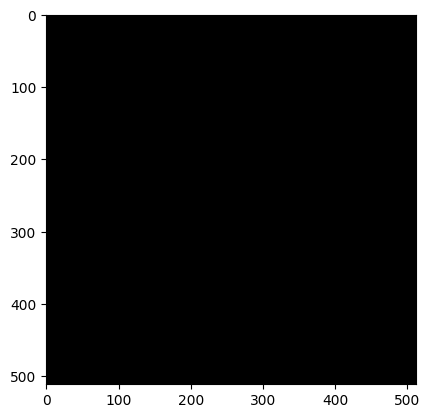

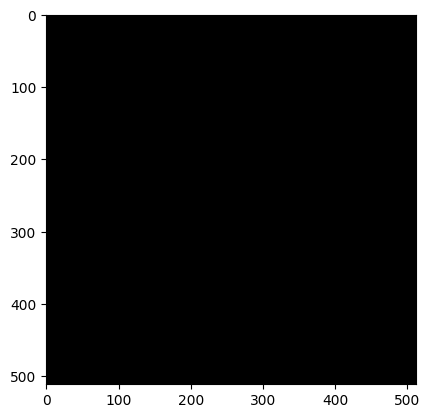

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Create a black image
image = np.zeros((512,512,3), np.uint8)

# Can we make this in black and white?
image_bw = np.zeros((512,512), np.uint8)

plt.imshow(image[...,::-1])
plt.figure()
plt.imshow(image_bw, cmap='gray')

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">ترسیم خط</div>
cv2.line(image, starting cordinates, ending cordinates, color, thickness)

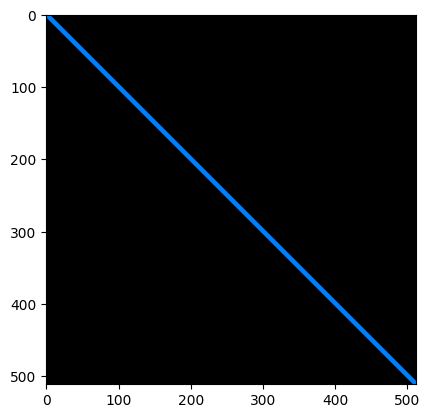

In [3]:
# Draw a diagonal blue line of thickness of 5 pixels
image = np.zeros((512,512,3), np.uint8)
# (x1,y1), (x2,y2), (B,G,R), thickness
cv2.line(image, (0,0), (511,511), (255,127,0), 5)
cv2.imshow("Blue Line", image)
plt.imshow(image[...,::-1])
cv2.waitKey(0)
cv2.destroyAllWindows()


<div class="alert alert-warning">
From the documentation, **OpenCV changes its behavior according to the type** of the array:
    <ul>
    <li>If the image is 8-bit unsigned, it is displayed as is.</li>
    <li>If the image is 16-bit unsigned or 32-bit integer, the pixels are divided by 256. That is, the value range [0,255*256] is mapped to [0,255].</li>
    <li>If the image is 32-bit floating-point, the pixel values are multiplied by 255. That is, the value range [0,1] is mapped to [0,255].</li>
    </ul>
    https://stackoverflow.com/questions/23749968/why-datatype-has-to-be-uint8-in-opencv-python-wrapper

</div>

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">ترسیم مستطیل</div>

cv2.rectangle(image, starting vertex, opposite vertex, color, thickness)

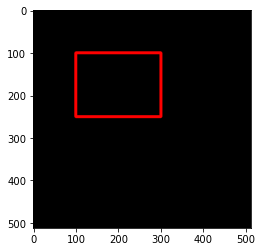

In [11]:
# Draw a Rectangle in
image = np.zeros((512,512,3), np.uint8)

cv2.rectangle(image, (100,100), (300,250), (0,0,255), 5)
cv2.imshow("Rectangle", image)
plt.imshow(image[...,::-1])
cv2.waitKey(0)
cv2.destroyAllWindows()

Try draw a rectangle on our image!

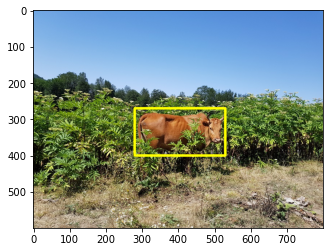

In [12]:
# Split the image into the B,G,R components
img = cv2.imread("./input.jpg")
cv2.rectangle(img, (280,270), (530,400), (0,255,255), 5)
plt.imshow(img[...,::-1])

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">ترسیم دایره</div>

cv2.cirlce(image, center, radius, color, thickness)
<div style="direction:rtl;text-align:right;font-family:Tahoma">
اگر thickness را منفی بدهیم چه میشود؟!
</div>

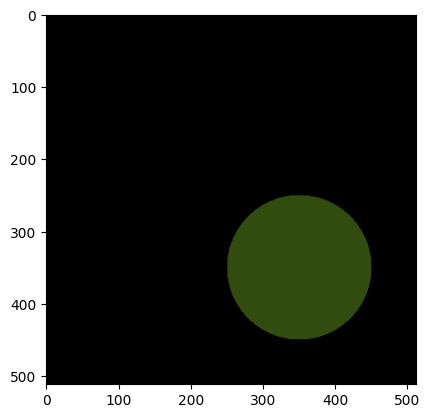

In [2]:
image = np.zeros((512,512,3), np.uint8)

cv2.circle(image, (350, 350), 100, (15,75,50), 7) 
cv2.imshow("Circle", image)
plt.imshow(image[...,::-1])
cv2.waitKey(0)
cv2.destroyAllWindows()

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">ترسیم بیضی</div>

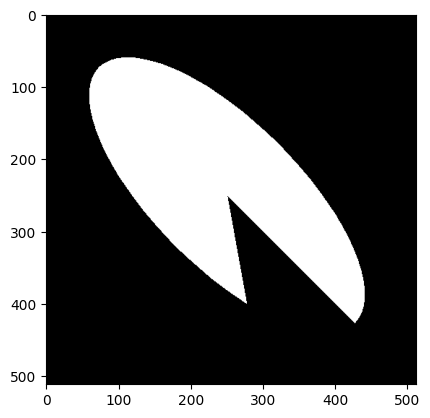

In [6]:
ellipse = np.zeros((512,512,3), np.uint8)

cv2.ellipse(ellipse, (250, 250), (250, 100), 45, 60, 360, (255,255,255), -1)

plt.imshow(ellipse[...,::-1])


In [7]:
?cv2.ellipse

Docstring:
ellipse(img, center, axes, angle, startAngle, endAngle, color[, thickness[, lineType[, shift]]]) -> img
.   @brief Draws a simple or thick elliptic arc or fills an ellipse sector.
.   
.   The function cv::ellipse with more parameters draws an ellipse outline, a filled ellipse, an elliptic
.   arc, or a filled ellipse sector. The drawing code uses general parametric form.
.   A piecewise-linear curve is used to approximate the elliptic arc
.   boundary. If you need more control of the ellipse rendering, you can retrieve the curve using
.   #ellipse2Poly and then render it with #polylines or fill it with #fillPoly. If you use the first
.   variant of the function and want to draw the whole ellipse, not an arc, pass `startAngle=0` and
.   `endAngle=360`. If `startAngle` is greater than `endAngle`, they are swapped. The figure below explains
.   the meaning of the parameters to draw the blue arc.
.   
.   ![Parameters of Elliptic Arc](pics/ellipse.svg)
.   
.   @param img Image

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">ترسیم چند ضلعی</div>


(4, 1, 2)


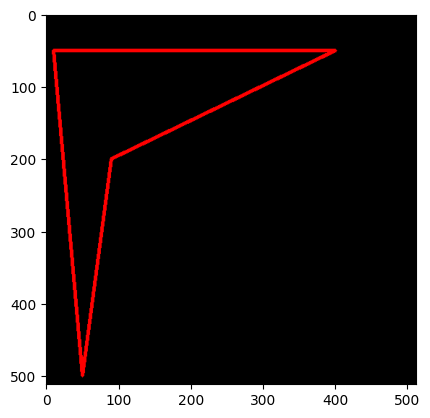

In [12]:
image = np.zeros((512,512,3), np.uint8)

# Let's define four points
pts = np.array( [[10,50], [400,50], [90,200], [50,500]], np.int32)
# Let's now reshape our points in form  required by polylines
pts = pts.reshape((-1,1,2))
print(pts.shape)

cv2.polylines(image, [pts], True, (0,0,255), 3)
plt.imshow(image[...,::-1])


 <div class="alert alert-warning">
If third argument is False, you will get a polylines joining all the points, not a closed shape.<br>
**cv2.polylines()** can be used to draw multiple lines. Just create a list of all the lines you want to draw and pass it to the function.<br>
All lines will be drawn individually. It is a much better and faster way to draw a group of lines than calling **cv2.line()** for each line.
<p>https://docs.opencv.org/3.1.0/dc/da5/tutorial_py_drawing_functions.html</p>
 </div>

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">افزودن نوشته</div>

cv2.putText(image, 'Text to Display', bottom left starting point, Font, Font Size, Color, Thickness)

- FONT_HERSHEY_SIMPLEX, FONT_HERSHEY_PLAIN
- FONT_HERSHEY_DUPLEX,FONT_HERSHEY_COMPLEX 
- FONT_HERSHEY_TRIPLEX, FONT_HERSHEY_COMPLEX_SMALL
- FONT_HERSHEY_SCRIPT_SIMPLEX
- FONT_HERSHEY_SCRIPT_COMPLEX

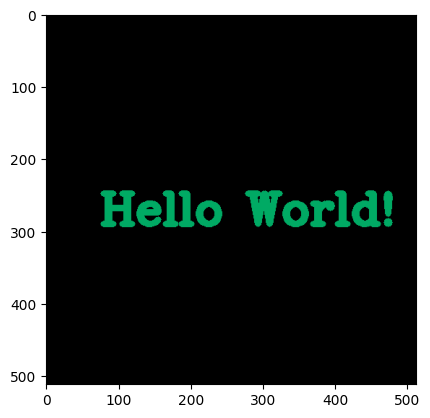

In [16]:
image = np.zeros((512,512,3), np.uint8)

cv2.putText(image, 'Hello World!', (75,290), cv2.FONT_HERSHEY_COMPLEX, 2, (100,170,0), 8)
plt.imshow(image[...,::-1])


## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">افزودن نوشته فارسی</div>


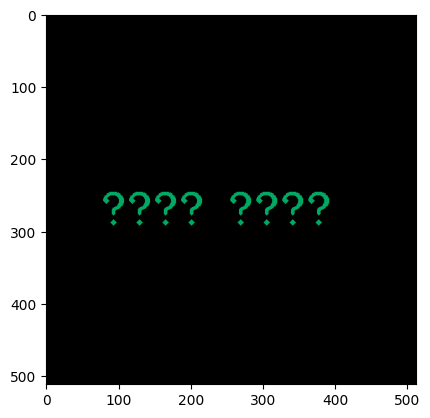

In [17]:
image = np.zeros((512,512,3), np.uint8)
text = "سلام دنیا"
cv2.putText(image, text, (75,290), cv2.FONT_HERSHEY_COMPLEX, 2, (100,170,0), 3)
plt.imshow(image[...,::-1])


In [20]:
# install: pip install arabic-reshaper
import arabic_reshaper

# install: pip install python-bidi
from bidi.algorithm import get_display

# install ==> pip install pillow
from PIL import Image, ImageFont, ImageDraw


image = np.zeros((512,512,3), np.uint8)

text_to_be_reshaped = 'سلام دنیا'
reshaped_text = arabic_reshaper.reshape(text_to_be_reshaped) # seperated chars problem
bidi_text = get_display(reshaped_text) #direction problem


text = bidi_text.encode().decode('utf-8') #encoding problem (rectangular boxes!)

pil_image = Image.fromarray(image)
font = ImageFont.truetype("arial", 100, encoding='unic')
draw = ImageDraw.Draw(pil_image)
draw.text((75,290), text, (100,170,0), font=font)

plt.imshow(pil_image)

ModuleNotFoundError: No module named 'arabic_reshaper'

In [46]:
np.asarray(pil_image).shape

(512, 512, 3)

In [19]:
open_cv_image = cv2.cvtColor(np.array(pil_image), cv2.COLOR_RGB2BGR)
cv2.imshow("open_cv_image", open_cv_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

NameError: name 'pil_image' is not defined

load a custom font

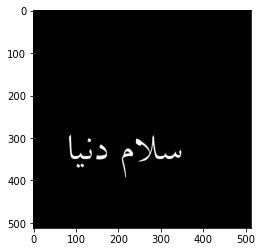

In [48]:
image = np.zeros((512,512,3), np.uint8)
pil_image = Image.fromarray(image)


font = ImageFont.truetype(font='font/BLotus.ttf', size=100, encoding='unic')
draw = ImageDraw.Draw(pil_image)
draw.text((75,290), text, (255,255,255), font=font)

plt.imshow(pil_image)